## Q1) Repair time is related to 2 factors: <br><br> 1. No of months since last maintenance<br> 2. Type of repair (mech, elect).<br><br>Predict repair time necessary for each maintenance request.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl                         #Plot figures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.anova import anova_lm     #O/P of anova table of reg model
from statsmodels.formula.api import ols          #for regression analysis

In [21]:
tb1 = pd.read_excel('dummy.xlsx')
tb1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, 'Simple Linear Regression')

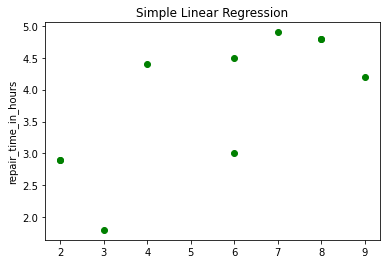

In [22]:
plt.scatter(tb1['months_since_last_service'], tb1['repair_time_in_hours'], color = 'green')
plt.ylabel('repair_time_in_hours')
plt.title('Simple Linear Regression')

## Simple Lin Reg : Only 1 Indep Var

In [23]:
Reg = ols(formula = 'repair_time_in_hours ~ months_since_last_service', data = tb1)
Fit1 = Reg.fit()
Fit1.summary()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Fri, 11 Mar 2022   Prob (F-statistic):             0.0163
Time:                          13:55:49   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.1473      0.605      3.549      0.008       0.752       3.542
months_since_last_service     0.3041      0.100      3.029      0.016       0.073       0.536
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.751
Skew:                          -0.501   Prob(JB):                        0.687
Kurtosis:                       2.107   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='red'><b>y = 2.14 + 0.34 (months_since_last_service)<br>
p val 0.016 < 0.05 (aplha): Reject Ho i.e. indep var is significant

## Standardized Residual Plot

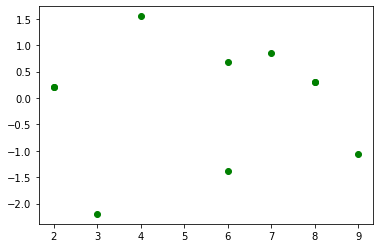

In [60]:
influence = Fit1.get_influence()
resid_student = influence.resid_studentized_external
plt.figure()
plt.scatter(tb1['months_since_last_service'], resid_student, color = 'green')

<font color='red'><b>Points should be bet 2 and -2: some pts goes beyond -2, it is violating our model assumptions

## Normal Prob Plot

F:\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


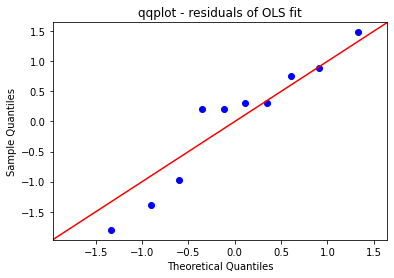

In [24]:
res = Fit1.resid #residuals
probplot = sm.ProbPlot(res, stats.norm, fit = True)
fig = probplot.qqplot(line = '45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

So many points away from red line, error is not following normal distribution

<font color='red'><b>Problem in varience of error variable

## Creating Dummies

In [25]:
just_dummies = pd.get_dummies(tb1['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


<font color='red'><b>elect - 1<br>
    mech - 0

In [26]:
just_dummies = pd.get_dummies(tb1['type_of_repair'])
step_1 = pd.concat([tb1, just_dummies], axis = 1)
step_1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours,electrical,mechanical
0,1,2,electrical,2.9,1,0
1,2,6,mechanical,3.0,0,1
2,3,8,electrical,4.8,1,0
3,4,3,mechanical,1.8,0,1
4,5,2,electrical,2.9,1,0
5,6,7,electrical,4.9,1,0
6,7,9,mechanical,4.2,0,1
7,8,8,mechanical,4.8,0,1
8,9,4,electrical,4.4,1,0
9,10,6,electrical,4.5,1,0


<font color='red'><b>To run the regression we want to get rid of the strings 'mechanical' and 'electrical' and we want to get rid of one dummy variable to avoid the dummy var trap arbitrarily chose 'mech', coeff on 'elect' would show effects of 'elect' relative to 'mech'

In [27]:
step_1.drop(['type_of_repair', 'mechanical'], inplace = True, axis = 1)
step_1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [30]:
result = sm.OLS(step_1['repair_time_in_hours'], sm.add_constant(step_1[['months_since_last_service', 'electrical']])).fit()
result.summary()

F:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Fri, 11 Mar 2022   Prob (F-statistic):            0.00105
Time:                          13:57:33   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9305      0.467      1.993      0.087      -0.174       2.035
months_since_last_service     0.3876      0.063      6.195      0.000       0.240       0.536
electrical                    1.2627      0.314      4.020      0.005       0.520       2.005
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='red'><b>y = 0.9305 + 0.387 months_since_last_service + 1.262 electrical<br>
R sq. increased, p val < 0.05: model is significant

### Here, beta1 = 1.262: electrical repairs requre 1.26 hrs more than mechanical repairs as we have taken 1 for electrical (it is taken as reference)<br><br>Both have elect = 1, mech = 0 and elect = 0, mech = 1 have same slope difference is in intercept : elect > mech<hr>

## Q2) Manager wants to know whether avg monthly salary is different for males and females.

In [31]:
tbl2 = pd.read_excel('dummy2.xlsx')
tbl2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


<font color='red'><b>Sal - dep Var<br>Gender - Indep<br>Exp - Indep

Text(0.5, 1.0, 'Simple Linear Regression')

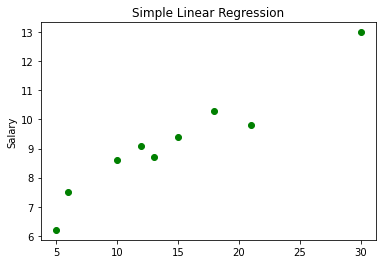

In [32]:
plt.scatter(tbl2['Experience'], tbl2['Salary'], color = 'green')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')

<font color='red'><b>As experience increases, salary increases

In [33]:
Reg2 = ols(formula = 'Salary ~ Experience', data = tbl2)
Fit2 = Reg2.fit()
Fit2.summary()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           3.30e-05
Time:                        14:15:42   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.000       4.854       6.764
Experience     0.2332      0.025      9.360      0.000       0.174       0.292
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.432
Skew:                          -0.918   Prob(JB):                        0.489
Kurtosis:                       2.331   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='red'><b>y = 5.8 + 0.2332 experience

### Residual Plot / Error Analysis

In [34]:
influence = Fit2.get_influence()
resid_student = influence.resid_studentized_external

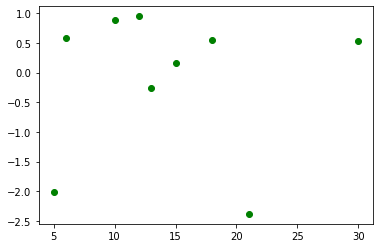

In [35]:
plt.figure()
plt.scatter(tbl2['Experience'], resid_student, color = 'green')

<font color='red'><b>It should be randomly distributes, most of the pts are above 0 line (there seems to be some pattern): <br>There is problem in assumptions, otherwise there are some other variables which effect the salary, apart from experience

### Quatile Plot

F:\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


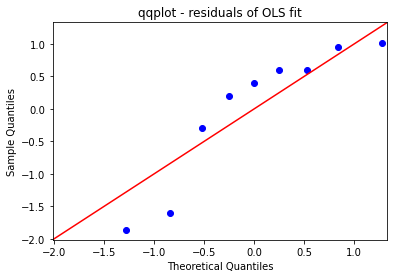

In [36]:
res = Fit2.resid
probplot = sm.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line = '45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

<font color='red'><b> Here most of the points are above the red line, they should sit on the line, theres is problem in assumption of eq var: <br>
Error is not following eq variance

### Creating Dummies

0 for males

In [37]:
just_dummies2 = pd.get_dummies(tbl2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [38]:
step_1 = pd.concat([tbl2, just_dummies2], axis = 1)
step_1

,Employee,Salary,Gender,Experience,Female,Male
0,1,7.5,Male,6,0,1
1,2,8.6,Male,10,0,1
2,3,9.1,Male,12,0,1
3,4,10.3,Male,18,0,1
4,5,13.0,Male,30,0,1
5,6,6.2,Female,5,1,0
6,7,8.7,Female,13,1,0
7,8,9.4,Female,15,1,0
8,9,9.8,Female,21,1,0


In [39]:
step_1.drop(['Gender', 'Male'], inplace = True, axis = 1)
step_1

,Employee,Salary,Experience,Female
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


In [42]:
result = sm.OLS(step_1['Salary'], sm.add_constant(step_1[['Female']])).fit()
result.summary()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.389
Time:                        14:28:16   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.000       7.682      11.718
Female        -1.1750      1.280     -0.918      0.389      -4.202       1.852
==============================================================================
Omnibus:                        0.387   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.280
Skew:                           0.330   Prob(JB):                        0.869
Kurtosis:                       2.441   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='red'><b>y = 9.7 - 1.17 female<br>
x1 0.389 > 0.05 : gender not significant<br><br>
intercept = 9.7 : avg sal of males, as gender = 0 for males<br>
slope = -1.175 : avg female sal is lower than avg male sal by 1.175<br><br>

<font color='red'><b>Here gender is not significant when experience is not concerned, only females are getting lesser salary

## Introduce Experience 

In [48]:
step_1 = pd.concat([tbl2, just_dummies2], axis = 1)
step_1

,Employee,Salary,Gender,Experience,Female,Male
0,1,7.5,Male,6,0,1
1,2,8.6,Male,10,0,1
2,3,9.1,Male,12,0,1
3,4,10.3,Male,18,0,1
4,5,13.0,Male,30,0,1
5,6,6.2,Female,5,1,0
6,7,8.7,Female,13,1,0
7,8,9.4,Female,15,1,0
8,9,9.8,Female,21,1,0


In [49]:
step_1.drop(['Gender', 'Male'], inplace = True, axis = 1)
step_1

,Employee,Salary,Experience,Female
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


<font color='red'><b>To run the regression we wanna get rid of the strings 'male' and 'female and we wanna get rid of one dummy var to avoid the dummy var trap arbitrarily chose 'male', coeff on 'female' would show effect of 'female' relative to male

In [52]:
result = sm.OLS(step_1['Salary'], sm.add_constant(step_1[['Experience', 'Female']])).fit()
result.summary()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.80e-05
Time:                        14:52:55   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.000       5.535       6.962
Experience     0.2271      0.016     14.089      0.000       0.188       0.267
Female        -0.7890      0.238     -3.309      0.016      -1.372      -0.206
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.198
Skew:                           0.174   Prob(JB):                        0.906
Kurtosis:                       2.363   Cond. No.                         44.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='red'><b>y = 6.24 + 0.221 experience - 0.789 female<br>
After introducing experience gender is significant : (p val) 0.016 < 0.05<br><br>
F value, Prob (F-stat) : very low, this model is significant than older

## If we put 0 for females and 1 for males

In [54]:
just_dummies2 = pd.get_dummies(tbl2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [56]:
step_1 = pd.concat([tbl2, just_dummies2], axis = 1)
step_1

,Employee,Salary,Gender,Experience,Female,Male
0,1,7.5,Male,6,0,1
1,2,8.6,Male,10,0,1
2,3,9.1,Male,12,0,1
3,4,10.3,Male,18,0,1
4,5,13.0,Male,30,0,1
5,6,6.2,Female,5,1,0
6,7,8.7,Female,13,1,0
7,8,9.4,Female,15,1,0
8,9,9.8,Female,21,1,0


<font color='red'><b>Put Female instead of Male unlike above

In [57]:
step_1.drop(['Gender', 'Female'], inplace = True, axis = 1)
step_1

,Employee,Salary,Experience,Male
0,1,7.5,6,1
1,2,8.6,10,1
2,3,9.1,12,1
3,4,10.3,18,1
4,5,13.0,30,1
5,6,6.2,5,0
6,7,8.7,13,0
7,8,9.4,15,0
8,9,9.8,21,0


In [59]:
result = sm.OLS(step_1['Salary'], sm.add_constant(step_1[['Male']])).fit()
result.summary()

F:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.389
Time:                        15:00:49   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5250      0.954      8.935      0.000       6.269      10.781
Male           1.1750      1.280      0.918      0.389      -1.852       4.202
==============================================================================
Omnibus:                        0.387   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.280
Skew:                           0.330   Prob(JB):                        0.869
Kurtosis:                       2.441   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='red'><b>Difference in Intercept, Slop sign is reversed: 1.17 i.e. males get this much higher salary<br>
   Intercept 8.525: Average female salary